# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
result = []
for city in cities:
    # city = "sept-iles"
    print(city)
    # Build query URL
    query_url = url + "appid=" +  weather_api_key + "&q=" + city + f"&units={units}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    time.sleep(1)
    try:
        lon = weather_json['coord']['lon']
        lat = weather_json['coord']['lat']
        name =  weather_json['name']
        max_temp =  weather_json['main']['temp_max']
        humidity = weather_json['main']['humidity']
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        county = weather_json['sys']['country']
        date = weather_json['dt']
        temp_dict = {'City': name,
                    'Lat': lat,
                    'Lng':lon,
                    'Max Temp':max_temp,
                    'Humidity':humidity,
                    'Cloudiness':cloudiness,
                    'Wind Speed':wind_speed,
                    'Country':county,
                    'Date':date}
        result.append(temp_dict)
    except:
        continue
  

mar del plata
nikolskoye
rikitea
sao filipe
jamestown
guarizama
vila velha
barrow
ulaanbaatar
vanimo
hamilton
raymondville
ushuaia
hermanus
saint-augustin
nanortalik
bengkulu
olinda
saint-paul
te anau
falkenberg
bredasdorp
artigas
lasa
chute-aux-outardes
chivilcoy
luderitz
newberg
boundiali
upernavik
busselton
puerto ayora
illoqqortoormiut
ambon
iqaluit
mergui
ilulissat
amderma
yellowknife
comodoro rivadavia
kaitangata
hobart
katsuura
bokoro
sotouboua
ballina
amuntai
fare
oranjestad
cervo
saint anthony
taolanaro
punta arenas
kalevala
tuktoyaktuk
bluff
lata
half moon bay
bani
guilin
ojinaga
petropavlovsk-kamchatskiy
hambantota
atuona
hilo
behbahan
beyneu
namatanai
toora-khem
alofi
faanui
tasiilaq
santa maria del oro
qaanaaq
belushya guba
santiago
kavieng
gladstone
grand centre
warragul
mataura
klaksvik
shirokiy
clyde river
hofn
saint-philippe
huambo
carnarvon
gizo
coquimbo
sahrak
byron bay
dikson
senanga
vaini
port blair
albany
cape town
kampot
thompson
tsilna
pawayan
ancud
marcona
sent

In [67]:
city_info = pd.DataFrame(result)
city_info.to_csv('city_df.csv')

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_info.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,53.600,40,90,4.63,US,1619309023
1,lavrentiya,65.5833,-171.0000,32.954,92,89,0.93,RU,1619309026
2,nevinnomyssk,44.6267,41.9453,46.400,57,40,2.00,RU,1619308821
3,albany,42.6001,-73.9662,62.600,29,75,1.54,US,1619308844
4,roura,4.7263,-52.3274,78.998,89,90,1.54,GF,1619309033


In [5]:
city_info.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.508556,12.957313,62.200762,69.292769,53.860670,3.494797,1.619310e+09
std,32.457653,91.780597,18.934149,22.899434,38.451015,2.224849,4.380894e+02
min,-54.800000,-179.166700,3.866000,7.000000,0.000000,0.150000,1.619309e+09
25%,-5.496950,-70.117250,48.416000,58.000000,14.000000,1.885000,1.619309e+09
50%,20.931000,13.503100,64.850000,75.000000,66.000000,3.090000,1.619310e+09
75%,44.865850,92.796700,78.800000,87.000000,91.000000,4.630000,1.619310e+09
max,78.218600,178.416700,98.600000,100.000000,100.000000,13.380000,1.619310e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
data1 = city_info.copy()
data1 = data1[data1['Humidity']<=100]
data1.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,19.508556,12.957313,62.200762,69.292769,53.860670,3.494797,1.619310e+09
std,32.457653,91.780597,18.934149,22.899434,38.451015,2.224849,4.380894e+02
min,-54.800000,-179.166700,3.866000,7.000000,0.000000,0.150000,1.619309e+09
25%,-5.496950,-70.117250,48.416000,58.000000,14.000000,1.885000,1.619309e+09
50%,20.931000,13.503100,64.850000,75.000000,66.000000,3.090000,1.619310e+09
75%,44.865850,92.796700,78.800000,87.000000,91.000000,4.630000,1.619310e+09
max,78.218600,178.416700,98.600000,100.000000,100.000000,13.380000,1.619310e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
data2 = data1[data1['Humidity']>100].index
data2

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data =   data1.drop(index=data1[data1['Humidity']>100].index, inplace=False)

clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,53.600,40,90,4.63,US,1619309023
1,lavrentiya,65.5833,-171.0000,32.954,92,89,0.93,RU,1619309026
2,nevinnomyssk,44.6267,41.9453,46.400,57,40,2.00,RU,1619308821
3,albany,42.6001,-73.9662,62.600,29,75,1.54,US,1619308844
4,roura,4.7263,-52.3274,78.998,89,90,1.54,GF,1619309033
...,...,...,...,...,...,...,...,...,...
562,samarai,-10.6167,150.6667,84.290,73,39,6.74,PG,1619310443
563,kamaishi,39.2667,141.8833,53.600,54,75,1.54,JP,1619310448
564,rivne,50.6231,26.2274,37.994,81,58,0.45,UA,1619310450
565,pinheiro,-2.5214,-45.0825,75.038,96,99,1.08,BR,1619310452


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

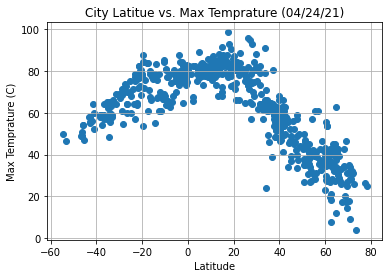

This plot clearly shows that the relation between latitude and max temperature, i.e. the more close to the equator, the hot it is


In [42]:
import datetime
dt_str = datetime.datetime.today().strftime('%m/%d/%y')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'])
ax.grid()
ax.set_title(f'City Latitue vs. Max Temprature ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temprature (C)')
plt.savefig('All City Latitue vs. Max Temprature.png')
plt.show()
print('This plot clearly shows that the relation between latitude and max temperature, i.e. the more close to the equator, the hot it is')

## Latitude vs. Humidity Plot

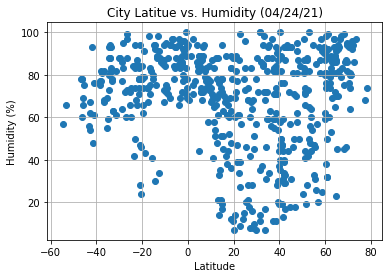

In [31]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(clean_city_data['Lat'], clean_city_data['Humidity'])
ax.grid()
ax.set_title(f'City Latitue vs. Humidity ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
plt.savefig('All City Latitue vs. Humidity.png')
plt.show()
print('This plot clearly shows that the relation between latitude and humidity, the span of humidity at north is much more broader.')

## Latitude vs. Cloudiness Plot

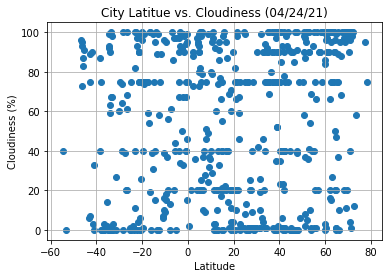

In [32]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'])
ax.grid()
ax.set_title(f'City Latitue vs. Cloudiness ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
plt.savefig('All City Latitue vs. Cloudiness.png')
plt.show()
print('This plot clearly shows that the relation between latitude and cloudiness, The distribution of south and north are similar.')

## Latitude vs. Wind Speed Plot

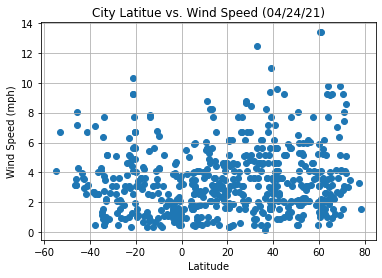

This plot clearly shows that the relation between latitude and wind speed, The distribution of south and north are similar.


In [43]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'])
ax.grid()
ax.set_title(f'City Latitue vs. Wind Speed ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
plt.savefig('All City Latitue vs. Wind Speed.png')
plt.show()
print('This plot clearly shows that the relation between latitude and wind speed, The distribution of south and north are similar.')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.808820


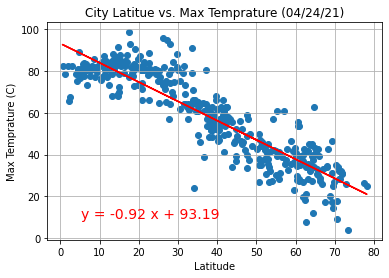

In [34]:
north_cities = clean_city_data[clean_city_data['Lat'] >= 0].copy()
from scipy.stats import linregress
res = linregress(north_cities['Lat'], north_cities['Max Temp'])
print(f"The r-value is: {res.rvalue**2:.6f}")
text = f'y = {res.slope:.2f} x + {res.intercept:.2f}'
import datetime
dt_str = datetime.datetime.today().strftime('%m/%d/%y')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(north_cities['Lat'], north_cities['Max Temp'])
ax.grid()
ax.set_title(f'City Latitue vs. Max Temprature ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temprature (C)')
ax.plot(north_cities['Lat'], 
        res.intercept + res.slope*north_cities['Lat'], 
        'r', 
        label='fitted line')
ax.text(0.1, 0.1, text, color='r', fontsize=14, transform=ax.transAxes)
plt.savefig('North City Latitue vs. Max Temprature.png')
plt.show()
print('Both of the north and south relation between Lat and Max T show clearly a linear correlation.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.539873


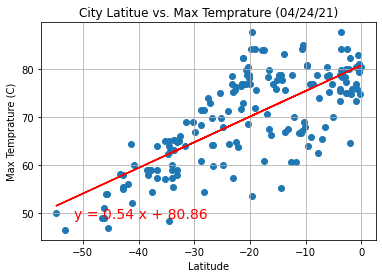

In [35]:
south_cities = clean_city_data[clean_city_data['Lat'] < 0].copy()
from scipy.stats import linregress
res = linregress(south_cities['Lat'], south_cities['Max Temp'])
print(f"The r-value is: {res.rvalue**2:.6f}")
text = f'y = {res.slope:.2f} x + {res.intercept:.2f}'
import datetime
dt_str = datetime.datetime.today().strftime('%m/%d/%y')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(south_cities['Lat'], south_cities['Max Temp'])
ax.grid()
ax.set_title(f'City Latitue vs. Max Temprature ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temprature (C)')
ax.plot(south_cities['Lat'], 
        res.intercept + res.slope*south_cities['Lat'], 
        'r', 
        label='fitted line')
ax.text(0.1, 0.1, text, color='r', fontsize=14, transform=ax.transAxes)
plt.savefig('South Latitue vs. Max Temprature.png')
plt.show()
print('Both of the north and south relation between Lat and Max T show clearly a linear correlation.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.015604


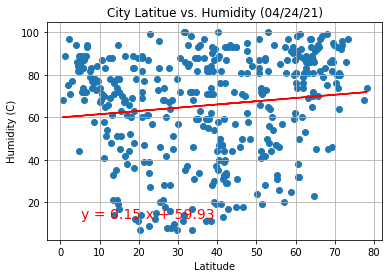

In [36]:
nouth_cities = clean_city_data[clean_city_data['Lat'] >= 0].copy()
from scipy.stats import linregress
res = linregress(nouth_cities['Lat'], nouth_cities['Humidity'])
print(f"The r-value is: {res.rvalue**2:.6f}")
text = f'y = {res.slope:.2f} x + {res.intercept:.2f}'
import datetime
dt_str = datetime.datetime.today().strftime('%m/%d/%y')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(nouth_cities['Lat'], nouth_cities['Humidity'])
ax.grid()
ax.set_title(f'City Latitue vs. Humidity ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (C)')
ax.plot(nouth_cities['Lat'], 
        res.intercept + res.slope*nouth_cities['Lat'], 
        'r', 
        label='fitted line')
ax.text(0.1, 0.1, text, color='r', fontsize=14, transform=ax.transAxes)
plt.savefig('North Latitue vs. Humidity.png')
plt.show()
print('North relation between Lat and Humidity doe not show a linear correlation.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.090729


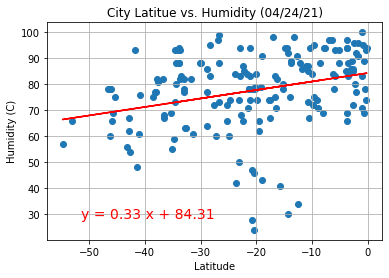

In [37]:
south_cities = clean_city_data[clean_city_data['Lat'] < 0].copy()
from scipy.stats import linregress
res = linregress(south_cities['Lat'], south_cities['Humidity'])
print(f"The r-value is: {res.rvalue**2:.6f}")
text = f'y = {res.slope:.2f} x + {res.intercept:.2f}'
import datetime
dt_str = datetime.datetime.today().strftime('%m/%d/%y')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(south_cities['Lat'], south_cities['Humidity'])
ax.grid()
ax.set_title(f'City Latitue vs. Humidity ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (C)')
ax.plot(south_cities['Lat'], 
        res.intercept + res.slope*south_cities['Lat'], 
        'r', 
        label='fitted line')
ax.text(0.1, 0.1, text, color='r', fontsize=14, transform=ax.transAxes)
plt.savefig('South Latitue vs. Humidity.png')
plt.show()
print('The south relation between Lat and Humidity shows a linear correlation.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.041224


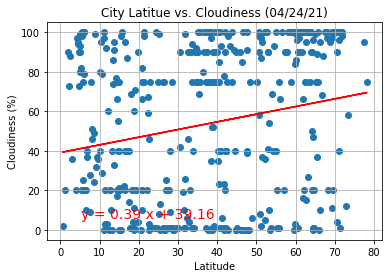

In [38]:
nouth_cities = clean_city_data[clean_city_data['Lat'] >= 0].copy()
from scipy.stats import linregress
res = linregress(nouth_cities['Lat'], nouth_cities['Cloudiness'])
print(f"The r-value is: {res.rvalue**2:.6f}")
text = f'y = {res.slope:.2f} x + {res.intercept:.2f}'
import datetime
dt_str = datetime.datetime.today().strftime('%m/%d/%y')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(nouth_cities['Lat'], nouth_cities['Cloudiness'])
ax.grid()
ax.set_title(f'City Latitue vs. Cloudiness ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.plot(nouth_cities['Lat'], 
        res.intercept + res.slope*nouth_cities['Lat'], 
        'r', 
        label='fitted line')
ax.text(0.1, 0.1, text, color='r', fontsize=14, transform=ax.transAxes)
plt.savefig('North Latitue vs. Cloudiness.png')
plt.show()
print('Neither north or south relation between Lat and Cloudiness shows a linear correlation.')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.030603


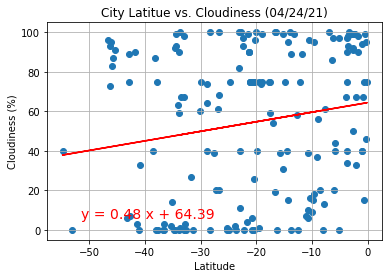

In [39]:
south_cities = clean_city_data[clean_city_data['Lat'] < 0].copy()
from scipy.stats import linregress
res = linregress(south_cities['Lat'], south_cities['Cloudiness'])
print(f"The r-value is: {res.rvalue**2:.6f}")
text = f'y = {res.slope:.2f} x + {res.intercept:.2f}'
import datetime
dt_str = datetime.datetime.today().strftime('%m/%d/%y')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(south_cities['Lat'], south_cities['Cloudiness'])
ax.grid()
ax.set_title(f'City Latitue vs. Cloudiness ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.plot(south_cities['Lat'], 
        res.intercept + res.slope*south_cities['Lat'], 
        'r', 
        label='fitted line')
ax.text(0.1, 0.1, text, color='r', fontsize=14, transform=ax.transAxes)
plt.savefig('South Latitue vs. Cloudiness.png')
plt.show()
print('Neither north or south relation between Lat and Cloudiness shows a linear correlation.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.011641


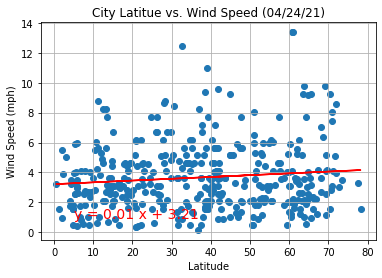

In [40]:
nouth_cities = clean_city_data[clean_city_data['Lat'] >= 0].copy()
from scipy.stats import linregress
res = linregress(nouth_cities['Lat'], nouth_cities['Wind Speed'])
print(f"The r-value is: {res.rvalue**2:.6f}")
text = f'y = {res.slope:.2f} x + {res.intercept:.2f}'
import datetime
dt_str = datetime.datetime.today().strftime('%m/%d/%y')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(nouth_cities['Lat'], nouth_cities['Wind Speed'])
ax.grid()
ax.set_title(f'City Latitue vs. Wind Speed ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.plot(nouth_cities['Lat'], 
        res.intercept + res.slope*nouth_cities['Lat'], 
        'r', 
        label='fitted line')
ax.text(0.1, 0.1, text, color='r', fontsize=14, transform=ax.transAxes)
plt.savefig('North Latitue vs. Wind Speed.png')
plt.show()
print('The North relation between Lat and Wind SPeed does not show a linear correlation.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.053782


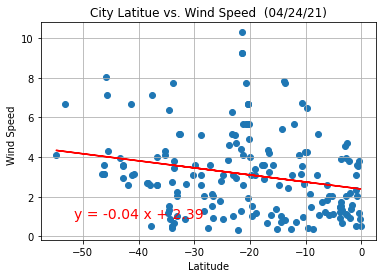

South relation between Lat and Wind Speed shows a weak linear correlation.


In [44]:
south_cities = clean_city_data[clean_city_data['Lat'] < 0].copy()
from scipy.stats import linregress
res = linregress(south_cities['Lat'], south_cities['Wind Speed'])
print(f"The r-value is: {res.rvalue**2:.6f}")
text = f'y = {res.slope:.2f} x + {res.intercept:.2f}'
import datetime
dt_str = datetime.datetime.today().strftime('%m/%d/%y')
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.scatter(south_cities['Lat'], south_cities['Wind Speed'])
ax.grid()
ax.set_title(f'City Latitue vs. Wind Speed  ({dt_str})')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed  ')
ax.plot(south_cities['Lat'], 
        res.intercept + res.slope*south_cities['Lat'], 
        'r', 
        label='fitted line')
ax.text(0.1, 0.1, text, color='r', fontsize=14, transform=ax.transAxes)
plt.savefig('South Latitue vs. Wind Speed .png')
plt.show()
print('South relation between Lat and Wind Speed shows a weak linear correlation.')